# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (20%)

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [5]:
### Your code here
data = pd.read_csv("SeoulBikeData.csv")

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

(array([4.545e+03, 4.214e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-17.8 ,  14.58,  46.96,  79.34, 111.72, 144.1 , 176.48, 208.86,
        241.24, 273.62, 306.  ]),
 <a list of 10 Patch objects>)

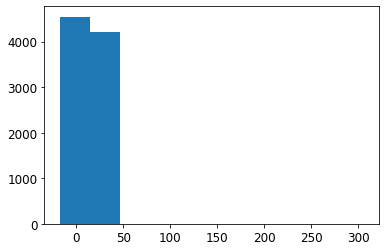

In [6]:
### Your code here
Temperature = data['Temperature (C)']
Humidity = data['Humidity (%)']
plt.hist(Temperature)

### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [7]:
### Your code here
Functioning_Day = data['Functioning Day']
should_del_data = data.loc[Functioning_Day == 'No']
new_data = data.loc[Functioning_Day != 'No']

print(data.shape)
print(should_del_data.shape)
print(new_data.shape)

# new_data not include the "Functioning day"  which means it remove rows from the dataframe where the business
# is closed

new_data = new_data.drop(columns = ["Functioning Day"])

(8760, 14)
(295, 14)
(8465, 14)


### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.** 

In [8]:
### Your code here

new_data = new_data.replace(["No Holiday", "Holiday"], [0, 1])

new_data['Holiday'] = new_data['Holiday'].astype('int')

In [9]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage:

The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [10]:
### Your code here
new_data['Spring'] = 0
new_data['Summer'] = 0
new_data['Autumn'] = 0
new_data['Winter'] = 0

conditions = [new_data.Seasons == "Winter",
              new_data.Seasons != "Winter"]

values = [1, 0]

new_data['Winter'] = np.select(conditions, values)

In [11]:
new_data = new_data.drop(columns = ['Seasons'])

In [12]:
new_data

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Spring,Summer,Autumn,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,0,0,0,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,0,0,0,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,0,0,0,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,0,0,0,0,0


It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [13]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:
new_data['Date'] = new_data['Date'].transform(date_is_weekday)

In [14]:
new_data.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Spring,Summer,Autumn,Winter
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [15]:
### Your code here
new_data['Rainfall(mm)'] = pd.to_numeric(new_data['Rainfall(mm)'], errors = 'coerce')
new_data['Snowfall (cm)'] = pd.to_numeric(new_data['Snowfall (cm)'], errors = 'coerce')
# new_data['Functioning Day'] = pd.to_numeric(new_data['Functioning Day'], errors = 'coerce')

In [16]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8440 non-null   float64
 10  Snowfall (cm)              8442 non-null   float64
 11  Holiday                    8465 non-null   int64  
 12  Spring                     8465 non-null   int64  
 13  Summer                     8465 non-null   int64

## Step 2: Visualise the data and perform further processing (20%)

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

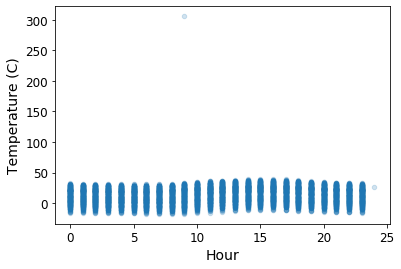

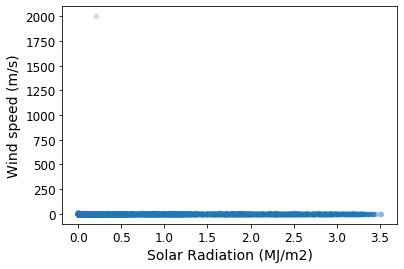

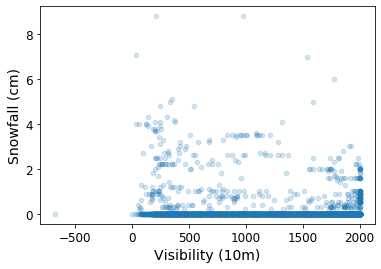

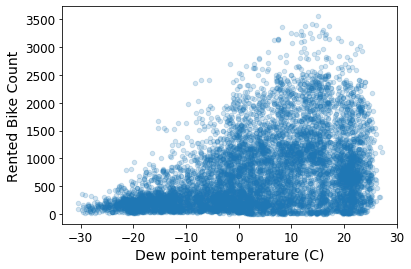

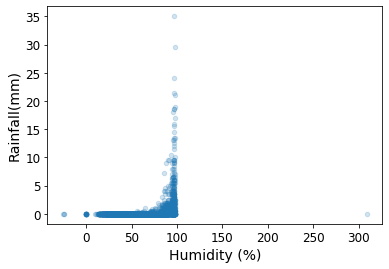

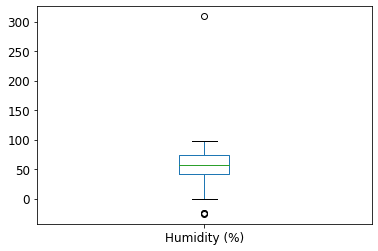

In [17]:
### Your code here
new_data.plot(kind = 'scatter', x = 'Hour', y = 'Temperature (C)', alpha=0.2)
new_data.plot(kind = 'scatter', x = 'Solar Radiation (MJ/m2)', y = 'Wind speed (m/s)', alpha=0.2)
new_data.plot(kind = 'scatter', x = 'Visibility (10m)', y = 'Snowfall (cm)', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Dew point temperature (C)', alpha=0.2)
new_data.plot(kind = 'scatter', x = 'Humidity (%)', y = 'Rainfall(mm)', alpha=0.2)
new_data.plot.box(y = 'Humidity (%)', x = 'Rainfall(mm)')

### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [18]:
### Your code here
count_nan = new_data.isnull().sum()
count_nan

Date                          0
Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                  0
Wind speed (m/s)              1
Visibility (10m)              0
Dew point temperature (C)     1
Solar Radiation (MJ/m2)       0
Rainfall(mm)                 25
Snowfall (cm)                23
Holiday                       0
Spring                        0
Summer                        0
Autumn                        0
Winter                        0
dtype: int64

In [19]:
new_data[new_data["Temperature (C)"] > 300] = np.nan
new_data[new_data["Wind speed (m/s)"] > 1000] = np.nan
new_data[new_data["Visibility (10m)"] < -400] = np.nan
new_data[new_data["Humidity (%)"] > 200] = np.nan
# new_data[new_data["Hour"] > 24] = np.nan

In [20]:
count_nan = new_data.isnull().sum()
count_nan

Date                          4
Rented Bike Count             4
Hour                          4
Temperature (C)               4
Humidity (%)                  4
Wind speed (m/s)              5
Visibility (10m)              4
Dew point temperature (C)     5
Solar Radiation (MJ/m2)       4
Rainfall(mm)                 29
Snowfall (cm)                27
Holiday                       4
Spring                        4
Summer                        4
Autumn                        4
Winter                        4
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median"))
])

### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [22]:
medians = np.median(new_data,axis=1)
print(medians)
new_data.info()
print(new_data.shape)

[0. 0. 0. ... 0. 0. 0.]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8461 non-null   float64
 1   Rented Bike Count          8461 non-null   float64
 2   Hour                       8461 non-null   float64
 3   Temperature (C)            8461 non-null   float64
 4   Humidity (%)               8461 non-null   float64
 5   Wind speed (m/s)           8460 non-null   float64
 6   Visibility (10m)           8461 non-null   float64
 7   Dew point temperature (C)  8460 non-null   float64
 8   Solar Radiation (MJ/m2)    8461 non-null   float64
 9   Rainfall(mm)               8436 non-null   float64
 10  Snowfall (cm)              8438 non-null   float64
 11  Holiday                    8461 non-null   float64
 12  Spring                     8461 non-null   float64
 13  Summer                  

In [23]:
for n in range(new_data.shape[-1]):
    new_data.iloc[:,n] = new_data.iloc[:,n].fillna(medians[n])
new_data.describe()    

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Spring,Summer,Autumn,Winter
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,0.711164,728.655877,11.503721,12.763237,58.103957,1.725281,1433.084584,3.941831,0.567673,0.149514,0.078721,0.048421,0.000473,0.000473,0.000473,0.255414
std,0.453248,642.117556,6.923650,12.103318,20.569033,1.034957,609.699367,13.237768,0.868225,1.125508,0.444260,0.214392,0.021734,0.021734,0.021734,0.436023
min,0.000000,0.000000,0.000000,-17.800000,-26.000000,0.000000,0.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,214.000000,6.000000,3.000000,42.000000,0.900000,934.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,542.000000,12.000000,13.400000,57.000000,1.500000,1689.000000,4.700000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.100000,0.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3556.000000,24.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
new_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature (C)              0
Humidity (%)                 0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature (C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Holiday                      0
Spring                       0
Summer                       0
Autumn                       0
Winter                       0
dtype: int64

In [25]:
### Your code here
new_data_np = pipeline.fit_transform(new_data)

In [26]:
print(np.sum(np.isnan(new_data_np),axis=0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
### Your written answer here


To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

Rented Bike Count            1.000000
Temperature (C)              0.563250
Hour                         0.426079
Dew point temperature (C)    0.400585
Solar Radiation (MJ/m2)      0.274338
Visibility (10m)             0.213075
Wind speed (m/s)             0.126154
Date                         0.047041
Autumn                      -0.024675
Summer                      -0.024675
Spring                      -0.024675
Holiday                     -0.071032
Rainfall(mm)                -0.128912
Snowfall (cm)               -0.153747
Humidity (%)                -0.200037
Winter                      -0.459304
Name: Rented Bike Count, dtype: float64

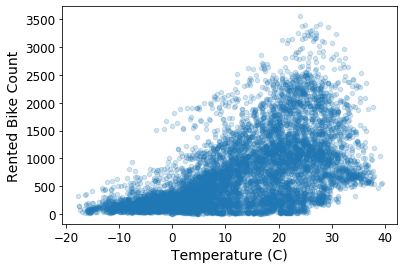

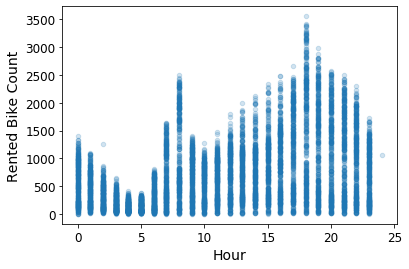

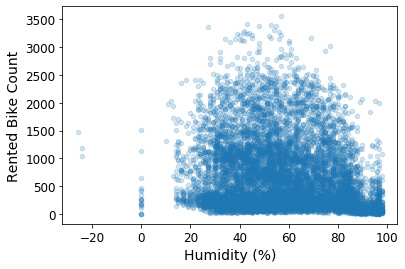

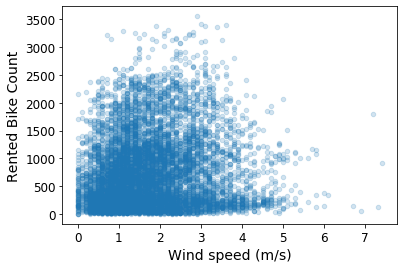

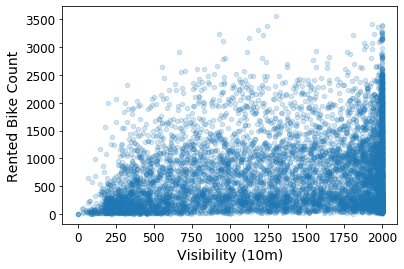

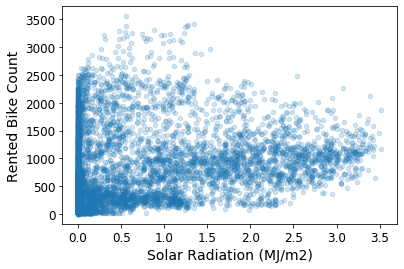

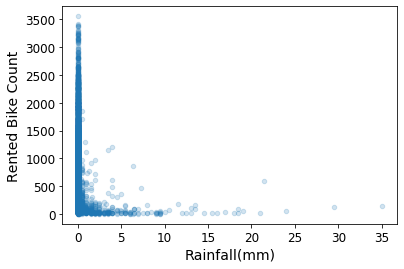

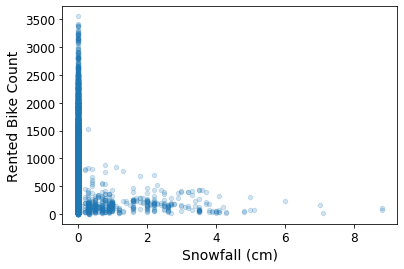

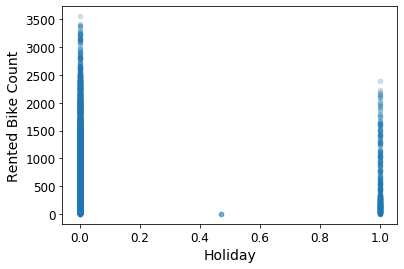

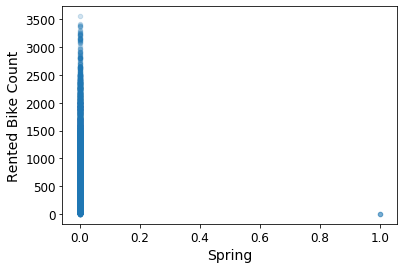

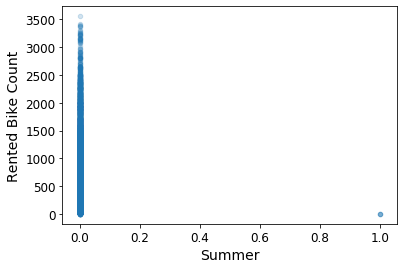

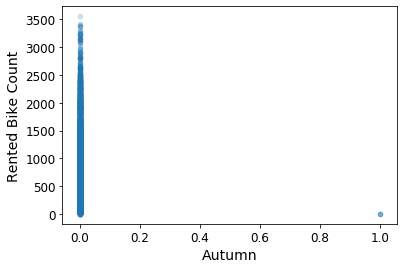

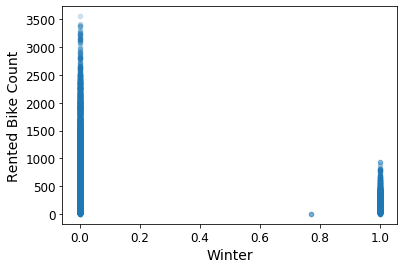

In [28]:
### Your code here
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Temperature (C)', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Hour', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Humidity (%)', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Wind speed (m/s)', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Visibility (10m)', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Solar Radiation (MJ/m2)', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Rainfall(mm)', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Snowfall (cm)', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Holiday', alpha=0.2)
# new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Functioning Day', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Spring', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Summer', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Autumn', alpha=0.2)
new_data.plot(kind = 'scatter', y = 'Rented Bike Count', x = 'Winter', alpha=0.2)

corr_matrix = new_data.corr()
corr_matrix["Rented Bike Count"].sort_values(ascending=False)

In [29]:
### Your written answers here
# Temperature (C)
# Dew point temperature (C)
# Hour

## Step 3: Predicting bike rentals (25%)

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [30]:
### Your code here

# split the data
import sklearn.model_selection

Ndata = new_data
train_set, test_set = train_test_split(Ndata, test_size=0.2)

NameError: name 'train_test_split' is not defined

In [ ]:
X_train = train_set.drop(["Rented Bike Count"], axis=1)
y_train = train_set["Rented Bike Count"].copy()
X_test = test_set.drop(["Rented Bike Count"], axis=1)
y_test = test_set["Rented Bike Count"].copy()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

std_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('linreg', LinearRegression())
    ]) 

std_pipeline.fit(X_train, y_train)
y_pred = std_pipeline.predict(X_test)
print(y_pred)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse:", rmse)

# R2 score
var = np.var(y_test)
R2 = 1 - mse/var
print("R2 score:", R2)

[1038.60274257  307.24755381  159.07110549 ...  410.48209414  626.08061328
 -219.37635936]
rmse: 440.14736162522456
R2 score: 0.5406784756997118


Show an appropriate **visualisation of the fit for your linear regression.**

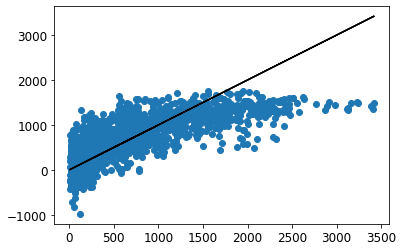

In [ ]:
### Your code here
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'k')

Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

[ 311.80824049 -419.55804054 -567.67945744 ... -316.32610198 -100.75940443
 -946.23234309]
rmse: 858.2320104458461
R2 score: -0.7463448561512223


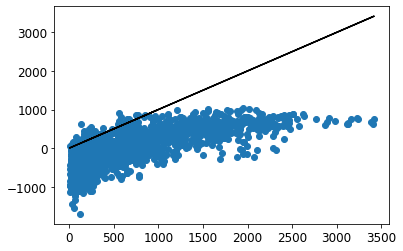

In [ ]:
### Your code here
from sklearn.kernel_ridge import KernelRidge

ridge_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('kernel', KernelRidge())
    ])

ridge_pipeline.fit(X_train, y_train)
y_pred = ridge_pipeline.predict(X_test)
print(y_pred)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse:", rmse)

# R2 score
var = np.var(y_test)
R2 = 1 - mse/var
print("R2 score:", R2)

plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'k')

The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

[890.44052624 349.52655434 336.13681449 ... 339.19932767 323.93684254
 299.12697373]
rmse: 513.7263894856193
R2 score: 0.3742737961705589


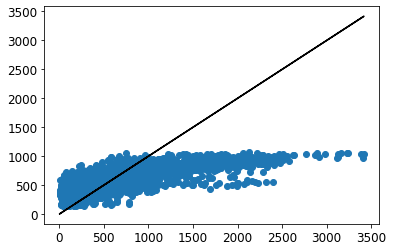

In [ ]:
### Your code here
from sklearn.svm import SVR

svm_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('svm', SVR())
    ])

svm_pipeline.fit(X_train, y_train)
y_pred = svm_pipeline.predict(X_test)
print(y_pred)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse:", rmse)

# R2 score
var = np.var(y_test)
R2 = 1 - mse/var
print("R2 score:", R2)

plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'k')

## Step 4: Cross validation (20%)

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [ ]:
### Your code here
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


print("linear regression model: ")
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)
for train_index, val_index in kf.split(X_train):
    X_trainr, X_val = X_train[train_index], X_train[val_index]
    y_trainr, y_val = y_train[train_index], y_train[val_index]
    std_pipeline.fit(X_trainr,y_trainr)
    y_pred = std_pipeline.predict(X_val)
    rmse_lin = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for linear regression is {rmse_lin}')
    y_pred = std_pipeline.predict(X_trainr)
    rmse_lin = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for linear regression is {rmse_lin}')

    
    
print(" ")    
print("Kernel Ridge model: ")
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)
for train_index, val_index in kf.split(X_train):
    X_trainr, X_val = X_train[train_index], X_train[val_index]
    y_trainr, y_val = y_train[train_index], y_train[val_index]
    ridge_pipeline.fit(X_trainr,y_trainr)
    y_pred = ridge_pipeline.predict(X_val)
    rmse_Ridge = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for Kernel Ridge is {rmse_Ridge}')
    y_pred = ridge_pipeline.predict(X_trainr)
    rmse_Ridge = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for Kernel Ridge is {rmse_Ridge}')
  

print(" ")
print("SVM model: ")
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)
for train_index, val_index in kf.split(X_train):
    X_trainr, X_val = X_train[train_index], X_train[val_index]
    y_trainr, y_val = y_train[train_index], y_train[val_index]
    svm_pipeline.fit(X_trainr,y_trainr)
    y_pred = svm_pipeline.predict(X_val)
    rmse_SVM = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for SVM is {rmse_SVM}')
    y_pred = svm_pipeline.predict(X_trainr)
    rmse_SVM = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for SVM is {rmse_SVM}')

linear regression model: 
VAL RMSE for linear regression is 457.82372299351385
TRAIN RMSE for linear regression is 433.50657379184463
VAL RMSE for linear regression is 464.7417851019582
TRAIN RMSE for linear regression is 432.58243751074116
VAL RMSE for linear regression is 456.3708889516859
TRAIN RMSE for linear regression is 433.6358909902932
VAL RMSE for linear regression is 446.6308858790719
TRAIN RMSE for linear regression is 434.71052236733607
VAL RMSE for linear regression is 409.9651499256128
TRAIN RMSE for linear regression is 438.6900384605503
VAL RMSE for linear regression is 429.33490077257414
TRAIN RMSE for linear regression is 436.6106393564348
VAL RMSE for linear regression is 444.4774744953178
TRAIN RMSE for linear regression is 434.92658121809916
VAL RMSE for linear regression is 411.9115040377707
TRAIN RMSE for linear regression is 438.47897698590725
VAL RMSE for linear regression is 395.34258767486415
TRAIN RMSE for linear regression is 440.21261425626443
VAL RMSE fo

On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?

In [ ]:
### Your answer here
# RMSE smaller is better. So linear regression model is better.

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this. 

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method. 

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**. 

In [ ]:
### Your code here
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge

KNN = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('KNN', KernelRidge())
    ])

parameters = {'KNN__alpha':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0]}

gridcv = GridSearchCV(KNN, parameters, cv=10, scoring='neg_mean_squared_error')

gridcv.fit(X_train, y_train)
print(f'Best score is {-gridcv.best_score_} for best params of {gridcv.best_params_}')  

Best score is 719141.4957817184 for best params of {'KNN__alpha': 1.0}


In [ ]:
gridcv.best_estimator_.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_test_pred = gridcv.best_estimator_.predict(X_test)
print(f'Test RMSE is {np.sqrt(mean_squared_error(y_test_pred,y_test))}')

Test RMSE is 860.2155230953599


**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**

In [ ]:
### Your answers here

